In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/Student_Performance.csv")

In [4]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


###CONVERTING CATEGORICAL DATA INTO A ONE-HOT VECTOR

In [12]:
df_encoded = pd.get_dummies(df, columns=['Extracurricular Activities'], drop_first=True)

In [16]:
df_encoded['Extracurricular Activities_Yes'] = df_encoded['Extracurricular Activities_Yes'].astype(float)

In [17]:
df_encoded.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,9,1,91.0,1.0
1,4,82,4,2,65.0,0.0
2,8,51,7,2,45.0,1.0
3,5,52,5,2,36.0,1.0
4,7,75,8,5,66.0,0.0


In [19]:
Performance_Index = df_encoded.pop('Performance Index')

In [20]:
df_encoded['Performance Index'] = Performance_Index

In [21]:
df_encoded.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes,Performance Index
0,7,99,9,1,1.0,91.0
1,4,82,4,2,0.0,65.0
2,8,51,7,2,1.0,45.0
3,5,52,5,2,1.0,36.0
4,7,75,8,5,0.0,66.0


In [31]:
X = df_encoded.iloc[:, :-1]

In [32]:
X.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
0,7,99,9,1,1.0
1,4,82,4,2,0.0
2,8,51,7,2,1.0
3,5,52,5,2,1.0
4,7,75,8,5,0.0


In [33]:
y=df_encoded.iloc[:,-1]

In [34]:
y.head()

,Performance Index
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0


# Exploratory Data Analysis

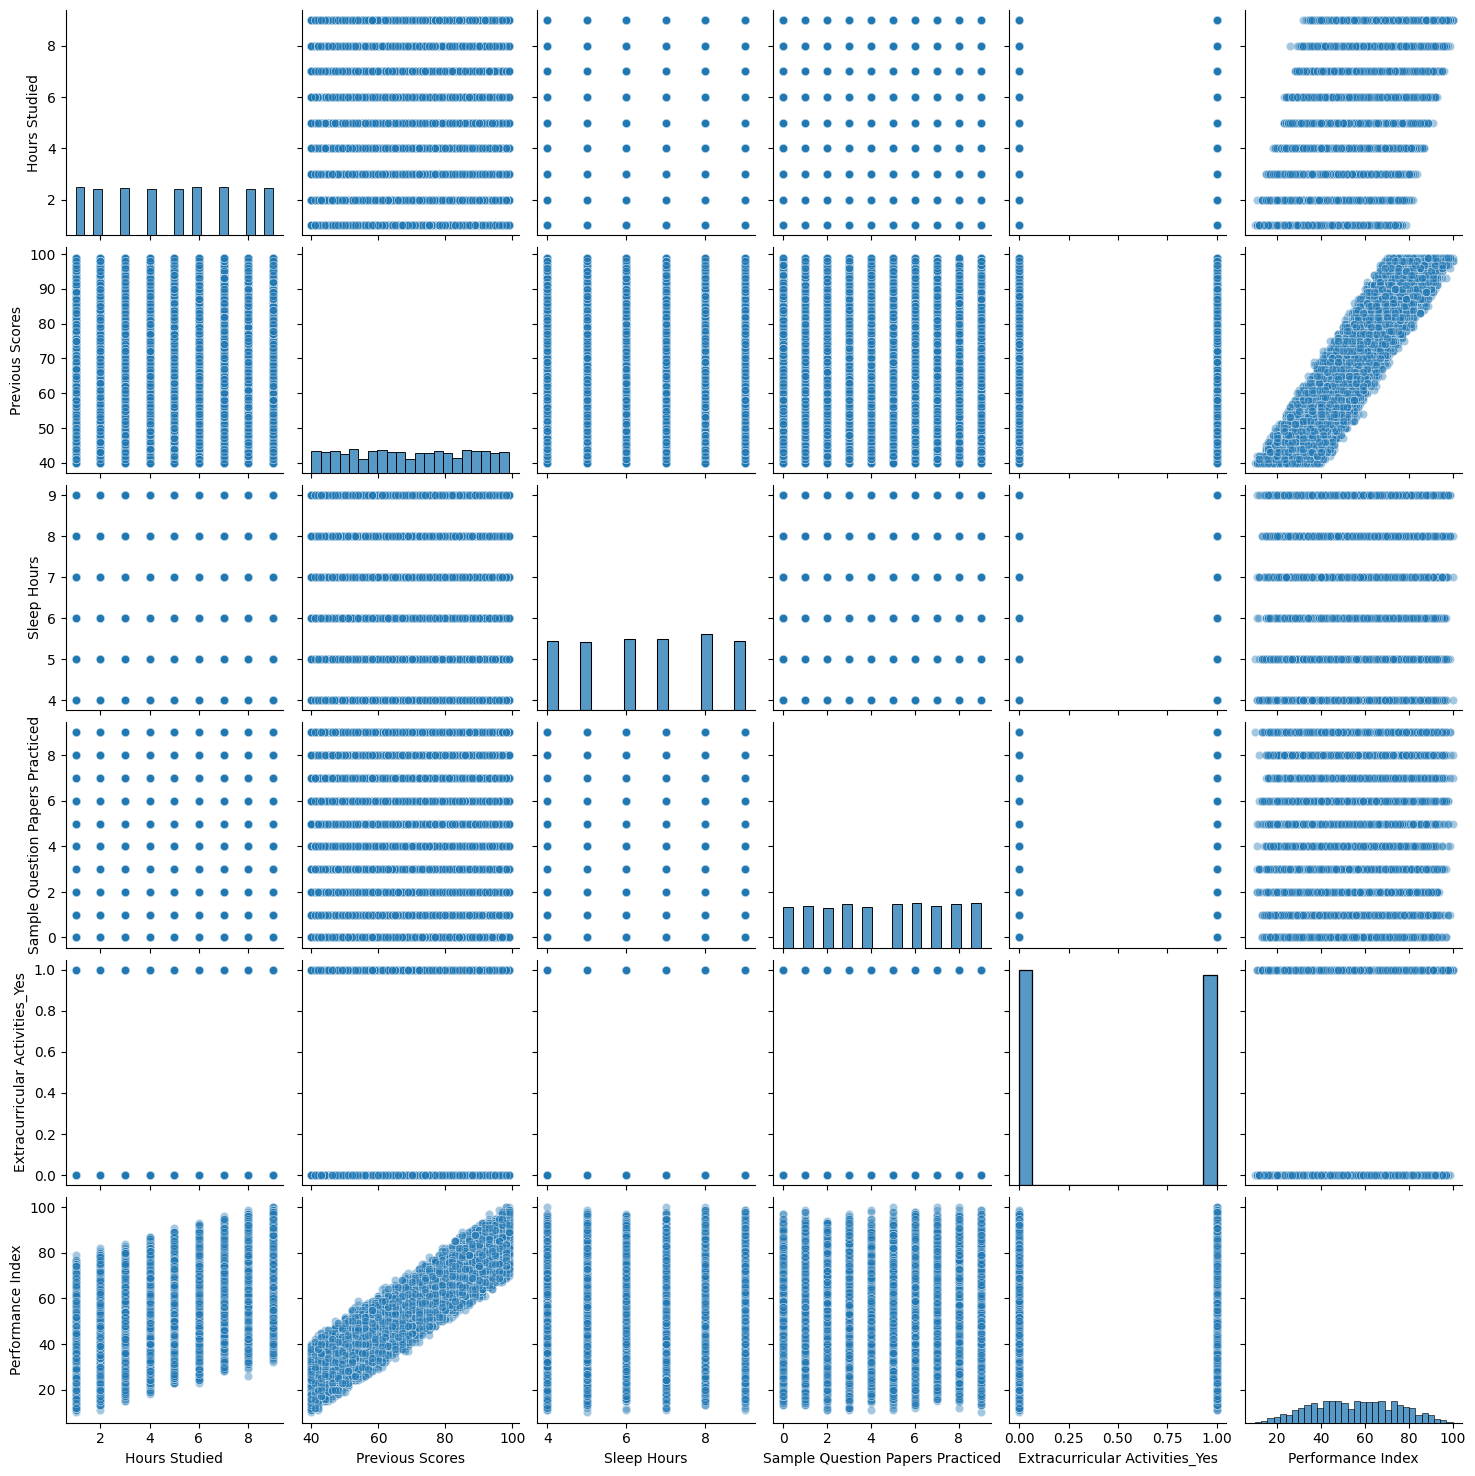

In [42]:
sns.pairplot(df_encoded, kind = "scatter", plot_kws = {'alpha' : 0.4})

Looking at the graphs above we can see that the columns "Previous Scores" and "Hours Studied" seem to be the most correlated to our Performance Index

# Splitting the dataset

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [48]:
X_train.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
9069,4,99,6,1,1.0
2603,6,90,9,3,1.0
7738,8,57,6,1,0.0
1579,6,92,8,7,1.0
5058,6,64,8,4,1.0


# Training the Model

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lm = LinearRegression()

In [51]:
lm.fit(X_train, y_train)

LinearRegression()

In [52]:
lm.coef_

array([2.85895223, 1.01551979, 0.47967676, 0.19039416, 0.58171285])

We can see which coefficients each feature has; i.e Hours Studied has a coefficient of 2.8589

# Predictions

In [53]:
prediction = lm.predict(X_test)

Text(0.5, 1.0, 'Evaluation of our model')

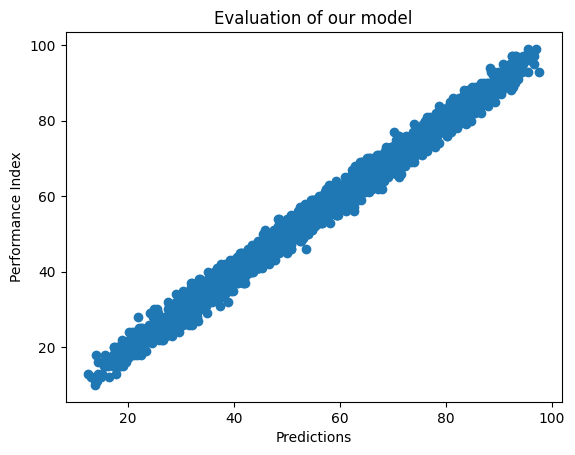

In [55]:
plt.scatter(prediction, y_test)
plt.xlabel("Predictions")
plt.ylabel("Performance Index")
plt.title("Evaluation of our model")

As we can see, the model seems to predict well the Performance Index, but let's see some metrics like mean absolute errro, mean squared error (MSE) and root mean squared error(RMSE)

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [59]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, prediction))
print("Mean Squared Error (MSE): ", mean_squared_error(y_test, prediction))
print("Root Mean Squared Error (RMSE): ", math.sqrt(mean_squared_error(y_test, prediction)))

Mean Absolute Error:  1.6090437564045224
Mean Squared Error (MSE):  4.066563824092683
Root Mean Squared Error (RMSE):  2.016572295776346


We can see very small errors which means we have a good model

# Analyzing the Residuals


In [60]:
residuals = y_test - prediction


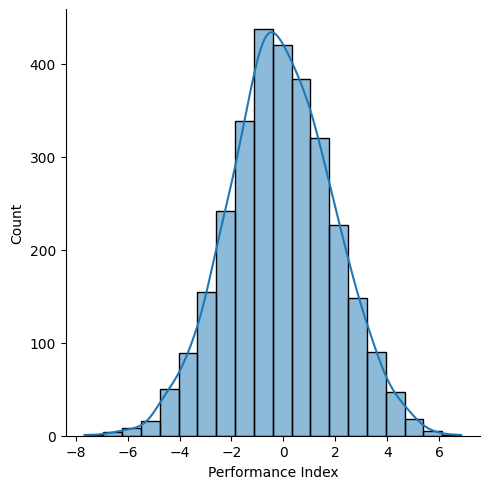

In [61]:
sns.displot(residuals, bins=20, kde = True)

We can see that our residuals make a nomral distribution which is exactly what we are looking for in a linear regression model
